In [1]:
### If False, takes a sample size from the 1.2 GB trade time series data, otherwise it takes the the whole set
BIG_DATA = False
%matplotlib inline

In [151]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import linregress
import this
# I downloaded the total bitcoin price history on the btce exchance which comprised
# of a 1.2GB csv file. When I read it in it will need to be read in by chunks like this
#f = pd.read_csv('btceUSD.csv',chunksize=5)
btce = pd.read_csv('/data/data/bitcoin/btceUSD.csv', 
                   names = ['timestamp','price','amount'])

### Load the other data set that shows the news markers (processing done in separate jupyter notebook)
news = np.load('data/news_markers_99BC.npy').item()

### Convert from epoch time to regular timestamps
#btce.timestamp = btce.timestamp.astype('datetime64[s]')

CPU times: user 10.4 s, sys: 560 ms, total: 11 s
Wall time: 11 s


In [153]:
%%time
"""
Slice this massive data set (1.3GB) into a more manageable size if not needed. The BIG_DATA variable in the first cell
affects this behavior
"""
print 'before random slice'
print len(btce)
if not BIG_DATA: 
    btce_slicer = np.random.choice(btce.index, len(btce)/100, replace = False)
    btce_slicer
    btce_slicer = np.sort(btce_slicer)
    btce = btce.iloc[btce_slicer]
    btce.index = np.arange(0,len(btce.timestamp))
print 'after random slice (if done)'
print len(btce)
x = np.array(btce.timestamp)
y = np.array(btce.price)

30137486
301374
CPU times: user 1.24 s, sys: 73.3 ms, total: 1.31 s
Wall time: 1.32 s


CPU times: user 1.72 s, sys: 363 ms, total: 2.08 s
Wall time: 1.7 s


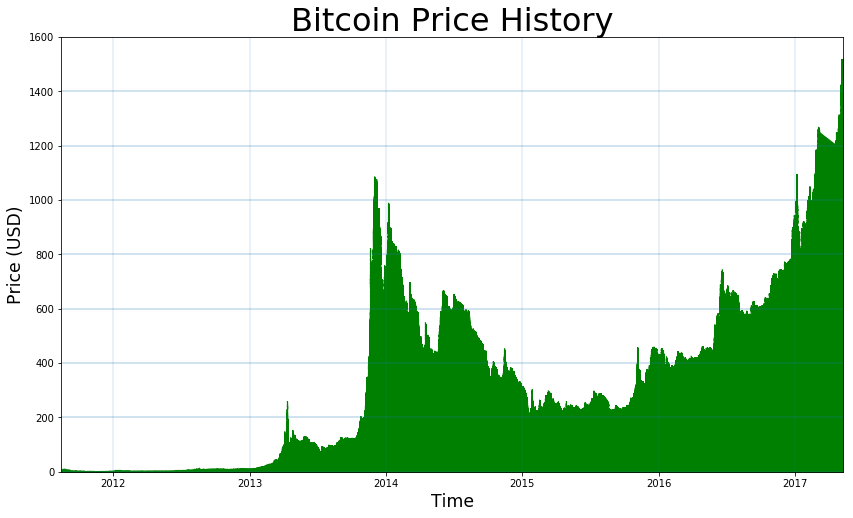

In [40]:
%%time
### Create my presentation worthy plot of the bitcoin price history
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(x,y,color='g',linestyle='dotted',lw=0.5)
# grid labels y=Constant
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj,ls='-', linewidth=0.4)
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj,ls='-', linewidth=0.2)
for xmin in ax.xaxis.get_minorticklocs():
    ax.axvline(x=xmin,ls='-', linewidth=0.2)
plt.xlabel('Time', fontsize = 'xx-large')
plt.ylabel('Price (USD)', fontsize = 'xx-large')
plt.xlim((min(x),max(x)))
plt.ylim((0,1600))
#plt.legend()
plt.fill_between(x,y,0,color='g')
plt.title('Bitcoin Price History', fontsize = 32)
plt.savefig('bitcoin_total_history.png',format='png')


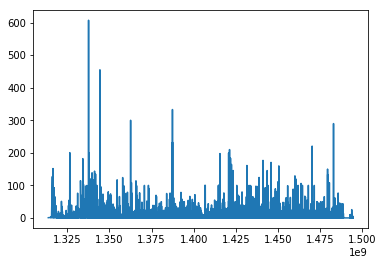

In [155]:
### Show the amount traded over time on the btce exchange
plt.plot(btce.timestamp,btce.amount)

In [118]:
#### Need to take each string from the dictionary and extract the 'day' and 'price'
import re
day = re.compile('day":(.{10})')
print day.search(news[0]).groups()[0]
price = re.compile('price":(.*)')
print price.search(news[0]).groups()[0]
textreg = re.compile('text":(.*",$)')
textreg = re.compile('"text":"(.*)",')
a = textreg.search(news[0]).groups()[0]
#print news[0][a.start():a.end()]
#print a
                   

1230940800
null
Genesis Block Established


In [119]:
##Extract the time series data
news_timestamp = np.empty(61)
news_prices=np.empty(61)
news_titles = np.array(np.empty(61), dtype='string')
dayreg = re.compile('day":(.{10})')
pricereg = re.compile('price":(.*)')
textreg = re.compile('text":(".*"),')
for i in news:
    news_timestamp[i]=dayreg.search(news[i]).groups()[0]
    price=pricereg.search(news[i]).groups()[0]
    title = textreg.search(news[i]).groups()[0]
    #print title
    #Some prices are the string 'null'
    if price == 'null':
        price = np.nan
    news_prices[i]= price
    news_titles[i] = title

In [120]:
"""
Now throw these numpy arrays in to a data frame
Probably should have just saved it as a dataframe to begin with on the other hand, 
now I have all the other data as well. so I might as well add it in the data frame! Trusty data frames!
"""
df = pd.DataFrame([news_timestamp,news_prices, news_titles]).T
df.columns = ['timestamp','price', 'title']

# First 5 values are np.nan so just set them to a penny
df.iloc[:5,1] = 0.1
### Can convert the epoch times into a normal date time but eventually complications arise
#df.timestamp = [x.astype('datetime64[s]') for x in df.timestamp]

,timestamp,price,title
0,1.23094e+09,NaN,"""Genesis Block Established"""
1,1.2547e+09,NaN,"""New Liberty Standard Publishes"
2,1.25531e+09,NaN,"""The First Bitcoin-to-Fiat Excha"
3,1.27449e+09,NaN,"""Two Pizzas Are First Material I"
4,1.27881e+09,NaN,"""Bitcoin Posted on Slashdot"""
5,1.27941e+09,0.07,"""Mt. Gox Opens For Business"""
6,1.28183e+09,0.07,"""Bitcoin Protocol Bug Causes Har"
7,1.29721e+09,0.96,"""Bitcoin Price Hits $1.00 USD"""
8,1.30118e+09,0.83,"""Three New Exchanges Open Suppor"
9,1.30689e+09,9.21,"""Gawker Publishes Article About"


CPU times: user 2.23 s, sys: 1.37 s, total: 3.6 s
Wall time: 1.98 s


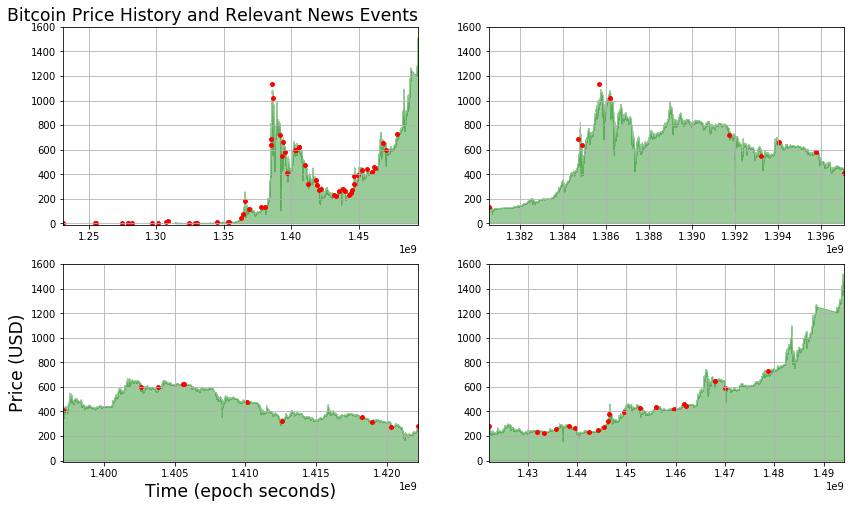

In [194]:
### Create a plot showing the interesting regions of the Bitcoin time series

%%time
secs_in_a_day = 60*60*24
plt.figure(figsize=(14,8))
#ax.plot(x,y, color='g',alpha = 0.1)
plt.subplot(221)
plt.fill_between(x,y,0,color='g', alpha = 0.4)
plt.scatter(df.timestamp,df.price,color='red',s=15)
plt.title(r'Bitcoin Price History and Relevant News Events', fontsize = 'xx-large', loc = 'right')
    
plt.xlim((min(df.timestamp),max(x)))
plt.ylim((-10,1600))
plt.grid(True)

plt.subplot(222)
plt.fill_between(x,y,0,color='g', alpha = 0.4)
plt.scatter(df.timestamp,df.price,color='red',s=15)
plt.xlim((df.timestamp[22],df.timestamp[31]))
plt.ylim((-10,1600))
plt.grid(True)

plt.subplot(223)
plt.xlabel('Time (epoch seconds)', fontsize = 'xx-large')
plt.ylabel('Price (USD)', fontsize = 'xx-large')
plt.xlim((df.timestamp[31],df.timestamp[41]))
plt.ylim((-10,1600))
plt.grid(True)
plt.fill_between(x,y,0,color='g', alpha = 0.4)
plt.scatter(df.timestamp,df.price,color='red',s=15)

plt.subplot(224)
plt.fill_between(x,y,0,color='g', alpha = 0.4)
plt.scatter(df.timestamp,df.price,color='red',s=15)
plt.xlim((df.timestamp[41],max(x)))
plt.ylim((-10,1600))
plt.grid(True)
plt.savefig('news_subplots.png', format='png')

In [196]:
### Now I want to see plots of the 10 days after major news events affecting bitcoin
### First I need to create all these plots to see what we're dealing with
#### The best way I can think of is to convert manually the number of days into seconds
secs_in_a_day = 60*60*24
### Now I need to add this amount to each point to view.
### First things first though I should really look at the mean distance between news events
news_freq = np.array([df.timestamp[i] - df.timestamp[i-1] for i in range(1, len(df.timestamp))])
print 'news freq mean', np.mean(news_freq)
print 'news freq std', np.std(news_freq)
print 'news freq med', np.median(news_freq)
### How many days is the average
print 'average days between news events', np.mean(news_freq)/secs_in_a_day
### How many of the news_freq's are below 10 days?
print 'number of news event gaps below 10 days', np.sum([i < 47.783333 for i in news_freq])
### Actually having zero is odd to me, This implies that the probability of news events over time is not valid for this case
### Possibly the maintainer of the site spread out the news events?
### how to determine of the news events are worthy?
### Still they seem like a good thing to start with before trying to scrape another news source. 
### I also need to get the NLP analysis of the text in place
### I'm definitely going to use Python as long as the R Syuzhet package doesn't throw any big curveballs
### Ok now that I have the news_freq, I can find the xrange to plot over for a shit ton of plots
### Now I'll put the ranges in a list of lists
subplot_ranges = [[df.timestamp[i],df.timestamp[i] + 10*secs_in_a_day] for i in range(len(df.timestamp))] 


4128480.0
4828260.30384
2419200.0
47.7833333333


[[1230940800.0, 1231804800.0],
 [1254700800.0, 1255564800.0],
 [1255305600.0, 1256169600.0],
 [1274486400.0, 1275350400.0],
 [1278806400.0, 1279670400.0]]

In [231]:
%%time
"""
Create a function to calculate the return rate over a time period of tau from the release of the news article.
To actually calculate the return rate I need to find the time of the news article and then find price1 and price2 in
the BTCE exchange data. This requires two "carry_indexes" to keep track of the position in the BTCE data frame. It is 
slightly confusing but it greatly speeds up the runtime from O(mn) to O(2n + m)=O(n) which for the BTCE data set is 
very noticeable.
"""
def find_price_offset(t, j):
    while btce.timestamp[j] < t:
        j = j + 1
    return btce.price[j], j

def calculate_news_RR(tau):
    return_rate_tau = []
    
    carry_index1 = 0
    carry_index2 = 0

    for i in range(len(df.price)):
        x0 = df.timestamp[i]
        p0, carry_index1 = find_price_offset(x0, carry_index1)
        x1 = x0 + secs_in_a_day*tau
        p1, carry_index2 = find_price_offset(x1, carry_index2)
        
        # Making sure not to divide by zero! Just saying RR = 0  in that case. 
        if p0 != 0:
            RR = ((p1 - p0)/p0)*100
        else:
            RR = 0
        return_rate_tau.append(RR)
    
    return return_rate_tau

In [234]:
taus = [1, 3, 7, 14, 30, 60, 120, 180, 360]
RRs = [calculate_news_RR(t) for t in taus]

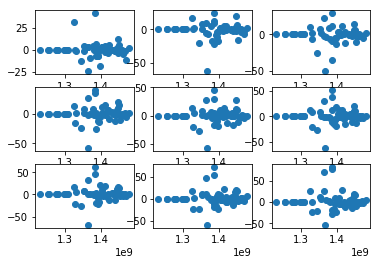

In [244]:
plt.figure()
plt.subplot(331)
plt.scatter(df.timestamp,RRs[0])
plt.subplot(332)
plt.scatter(df.timestamp,RRs[1])
plt.subplot(333)
plt.scatter(df.timestamp,RRs[2])
plt.subplot(334)
plt.scatter(df.timestamp,RRs[3])
plt.subplot(335)
plt.scatter(df.timestamp,RRs[4])
plt.subplot(336)
plt.scatter(df.timestamp,RRs[5])
plt.subplot(337)
plt.scatter(df.timestamp,RRs[6])
plt.subplot(338)
plt.scatter(df.timestamp,RRs[7])
plt.subplot(339)
plt.scatter(df.timestamp,RRs[8])

In [199]:
%%time
"""
Find specific indexes to slice by before going through the loop because this is a computationally expensive process
"""
index_list = []
for i in range(0, len(subplot_ranges)):
    
    xmin = subplot_ranges[i][0]
    xmax = subplot_ranges[i][1]
    
    direct_slice = btce.loc[(btce.timestamp > xmin) & (btce.timestamp < xmax)].index
    if len(direct_slice) != 0:
        index_list.append([direct_slice[0],direct_slice[-1]+1])
    else:
        index_list.append([])

1230940800.0 1231804800.0
1254700800.0 1255564800.0
1255305600.0 1256169600.0
1274486400.0 1275350400.0
1278806400.0 1279670400.0
1279411200.0 1280275200.0
1281830400.0 1282694400.0
1297209600.0 1298073600.0
1301184000.0 1302048000.0
1306886400.0 1307750400.0
1308441600.0 1309305600.0
1324252800.0 1325116800.0
1328918400.0 1329782400.0
1330560000.0 1331424000.0
1345161600.0 1346025600.0
1352937600.0 1353801600.0
1354060800.0 1354924800.0
1362960000.0 1363824000.0
1364169600.0 1365033600.0
1365552000.0 1366416000.0
1368489600.0 1369353600.0
1377820800.0 1378684800.0
1380585600.0 1381449600.0
1384732800.0 1385596800.0
1384905600.0 1385769600.0
1385683200.0 1386547200.0
1386201600.0 1387065600.0
1391731200.0 1392595200.0
1393200000.0 1394064000.0
1394064000.0 1394928000.0
1395792000.0 1396656000.0
1397088000.0 1397952000.0
1402617600.0 1403481600.0
1403827200.0 1404691200.0
1405555200.0 1406419200.0
1405641600.0 1406505600.0
1410134400.0 1410998400.0
1412553600.0 1413417600.0
1418256000.0

In [222]:
len(index_list[0])

0

In [203]:
#btce.iloc[index_list[12][0]:index_list[12][1],:]

,timestamp,price,amount
27632,1328918414,5.796,4.800000
27633,1328918612,5.796,0.200000
27634,1328918612,5.797,1.349590
27635,1328918612,5.798,1.000000
27636,1328918612,5.799,0.448523
27637,1328918612,5.799,1.040000
27638,1328918612,5.799,0.500000
27639,1328918612,5.799,0.461892
27640,1328922311,5.690,0.689937
27641,1328922349,5.699,0.990000


NameError: name 'subplot_ranges' is not defined

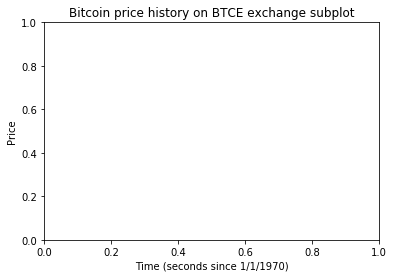

In [6]:
## Slice y data by these ranges
## I'll create a nice for loop to do it. Plot every plot with correct labels

## Preliminary stuff
## Set axis aesthetics
fig, ax = plt.subplots()
 
ax.set_xlabel('Time (seconds since 1/1/1970)')
ax.set_ylabel('Price')
ax.set_title(r'Bitcoin price history on BTCE exchange subplot')

start = 0
linear_fits = []
    
for i in range(start, len(subplot_ranges)):
    
 #   xmin = subplot_ranges[i][0]
 #   xmax = subplot_ranges[i][1]
    
    ### Make sure that there is data to grab
    if len(index_list[i]) == 0:
        linear_fits.append([])
        continue
    
    x = btce.iloc[index_list[i][0]:index_list[i][1],:].timestamp
        
    print 'length of elements ' + str(i) + ', ' + str(len(x))
        
    y = btce.iloc[index_list[i][0]:index_list[i][1],:].price
    
    #All the data
    ax.plot(x,y,linewidth=0.3)
    
    #The annotation point
    ax.scatter(df.timestamp[i],df.price[i],s=25)
    
    #Annotate the point
    plt.text(df.timestamp[i], df.price[i], df.title[i])
    
    #Fit then plot the fitted line
    #slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    fit = stats.linregress(x,y)
    linear_fits.append(fit)
    #fit_label = 'slope = {a}, r_value = {b}, p_value = {c}, std_err = {d}'.format(a=str(fit.slope),b=str(fit.rvalue),
                                                                            #     c=str(fit.pvalue),d=fit.stderr)
    ax.plot(x, fit.intercept + fit.slope*x, 'r', label= 'fitted line')
    
    # grid labels y=Constant
    for ymaj in ax.yaxis.get_majorticklocs():
        ax.axhline(y=ymaj,ls='-', linewidth=0.4)
    
    ## Legend!
    #ax.legend( [str(slope), str(intercept), str(r_value)],
     #      ('slope', 'intercept', 'r_value'),
     #      'upper right' )
    ### Calculate proper text gap (10% of y plot size?)
    text_gap = (ax.get_ylim()[1] - ax.get_ylim()[0])/12
    xplot = ax.get_xlim()[0]
    
    ax.text(xplot, ax.get_ylim()[1] - text_gap, 'slope={a}'.format(a=str(fit.slope)), color='green', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))
    ax.text(xplot, ax.get_ylim()[1]-text_gap*2, 'intercept={a}'.format(a=str(fit.intercept)), color='green', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))
    ax.text(xplot, ax.get_ylim()[1]-text_gap*3, 'pvalue={a}'.format(a=str(fit.pvalue)), color='green', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))
    ax.text(xplot, ax.get_ylim()[1]-text_gap*4, 'rvalue={a}'.format(a=str(fit.rvalue)), color='green', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))
    ax.text(xplot, ax.get_ylim()[1]-text_gap*5, 'stderr={a}'.format(a=str(fit.stderr)), color='green', 
        bbox=dict(facecolor='none', edgecolor='green', boxstyle='round'))
    
    #ax.legend()
    
    #Dummy string for plot save file
    __ = 'figures/BTCE_and_news{num}.png'.format(num=str(i))    
    plt.savefig(__)
    ax.clear()
    #### DEBUGGING
    #if i > 13:
    #    break

#plt.show()
plt.close()
linear_fits
    

In [224]:
len(linear_fits)

61

(array([  1.,   0.,   0.,   0.,   2.,   0.,   1.,   4.,   6.,  27.,   8.,
          5.,   2.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ -2.77596735e-04,  -2.49049306e-04,  -2.20501878e-04,
         -1.91954449e-04,  -1.63407020e-04,  -1.34859591e-04,
         -1.06312162e-04,  -7.77647336e-05,  -4.92173048e-05,
         -2.06698760e-05,   7.87755275e-06,   3.64249815e-05,
          6.49724103e-05,   9.35198391e-05,   1.22067268e-04,
          1.50614697e-04,   1.79162125e-04,   2.07709554e-04,
          2.36256983e-04,   2.64804412e-04,   2.93351841e-04,
          3.21899269e-04,   3.50446698e-04,   3.78994127e-04,
          4.07541556e-04,   4.36088985e-04,   4.64636413e-04,
          4.93183842e-04,   5.21731271e-04,   5.50278700e-04,
          5.78826128e-04]),
 <a list of 30 Patch objects>)

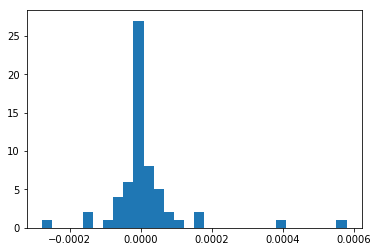

In [228]:
slopes = np.zeros(61)
for i in range(len(linear_fits)):
    if linear_fits[i] == []:
        continue
    slopes[i] = linear_fits[i].slope

plt.hist(slopes, bins = 30)
        

In [257]:
from scipy import stats
#uu = np.random.random(10)
#vv = np.array([math.sin(i) for i in uu])
x = list(df.timestamp)
### Manually remove some pesky nans
df.price[0:5] = 0.01
y = list(df.price)
#print len(df.timestamp), len(df.price), type(df.timestamp), type(df.price)
#print type(uu)
#s_fit = stats.linregress(x,y)
s_fit = stats.linregress(x, y)
#print s_fit
print s_fit


LinregressResult(slope=2.6371508299023871e-06, intercept=-3343.7976699018636, rvalue=0.6008039697214459, pvalue=3.0696299544270357e-07, stderr=4.5681289372164839e-07)


In [175]:
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(12345678)
x = np.random.random(10)
y = np.random.random(10)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
a = stats.linregress(x,y)
print slope,intercept,r_value,p_value,std_err

0.344864260747 0.268578235245 0.283552937807 0.427239426468 0.412351890903


In [ ]:
### Just make a function of my preferred plot settings at this point. I think that perhaps plotting is faster when
### I just set the lables and grid first? Seems like it shouldn't matter but setting up this way to check. 
def plot_price_and_news(x,y,SHOW=False,identifier=''):
    fig, ax = plt.subplots()
    ax.set_xlabel('Time (seconds since 1/1/1970)')
    ax.set_ylabel('Price')
    ax.set_title(r'Bitcoin price history on BTCE exchange')

    for ymaj in ax.yaxis.get_majorticklocs():
      ax.axhline(y=ymaj,ls='-', linewidth=0.4)
    #for ymin in ax.yaxis.get_minorticklocs():
    #  ax.axhline(y=ymin,ls='--')   
    
    
    xmin = subplot_ranges[i][0]
    xmax = subplot_ranges[i][1]
    #Slice the data
    x = btce.iloc[list((btce.timestamp > xmin) & (btce.timestamp < xmax))].timestamp
    y = btce.iloc[list((btce.timestamp > xmin) & (btce.timestamp < xmax))].price
    
    __ = 'BTCE_and_news{s}.png'.format(s=identifier)
    
    ax.plot(x,y,linewidth=0.5)
    ax.scatter(df.timestamp,df.price,color='red',s=9)
    
    plt.savefig(__)
    if SHOW:
        plt.show()


In [31]:
plot_price_and_news(x,y,False,'test')